In [39]:
import anndata as ad
import scanpy as sc
import eggplant as eg

import pandas as pd
import numpy as np
from PIL import Image

import matplotlib.pyplot as plt

## Show references

In [35]:
MOB_PTHS = {"image":"/home/alma/w-projects/ccf/rsc/ref/science-mob/science-mob-wo-reds.png",
           "landmarks":"/home/alma/w-projects/ccf/rsc/ref/science-mob/science-mob_landmarks.tsv",
           }

HIP_PTHS = {"image":"/home/alma/w-projects/ccf/rsc/ref/hippo/hippo-ref.png",
           "landmarks":"/home/alma/w-projects/ccf/rsc/ref/hippo/hippo-reference_landmarks.tsv",
           }

SYN_PTHS = {"image":"/home/alma/w-projects/ccf/rsc/ref/2comp_2/ref.png",
           "landmarks":"/home/alma/w-projects/ccf/rsc/ref/2comp_2/landmarks/ref_landmarks.tsv",
           }

BCA_PTHS = "/home/alma/w-projects/sploc/data/visium/bc2/bcA.h5ad"

BCB_PTHS = "/home/alma/w-projects/ccf/data/bc/bc2/bcB.h5ad"




In [7]:
read_img = lambda f: Image.open(f)
read_lmk = lambda f: pd.read_csv(f,sep="\t",header = 0,index_col =0)

In [93]:
def viz_ref(img,lmk,marker_size):
    _lmk = eg.ut.pd_to_np(lmk)
    if isinstance(img,Image.Image):
        figsize = np.array(img.size) / 100
        plt.figure(figsize = figsize)
    elif isinstance(img,np.ndarray):
        figsize = np.array(img.shape[0:2]) / 100
        plt.figure(figsize=figsize)
    print(figsize)
    plt.imshow(img)
    for ii in range(len(lmk)):
        plt.scatter(_lmk[ii,0],
                    _lmk[ii,1],
                    marker = "*",
                    c = eg.constants.LANDMARK_CMAP[ii % len(eg.constants.LANDMARK_CMAP)],
                    s = marker_size,
                    edgecolor ="black",
                   )
    plt.axis("off")
  #  return fig

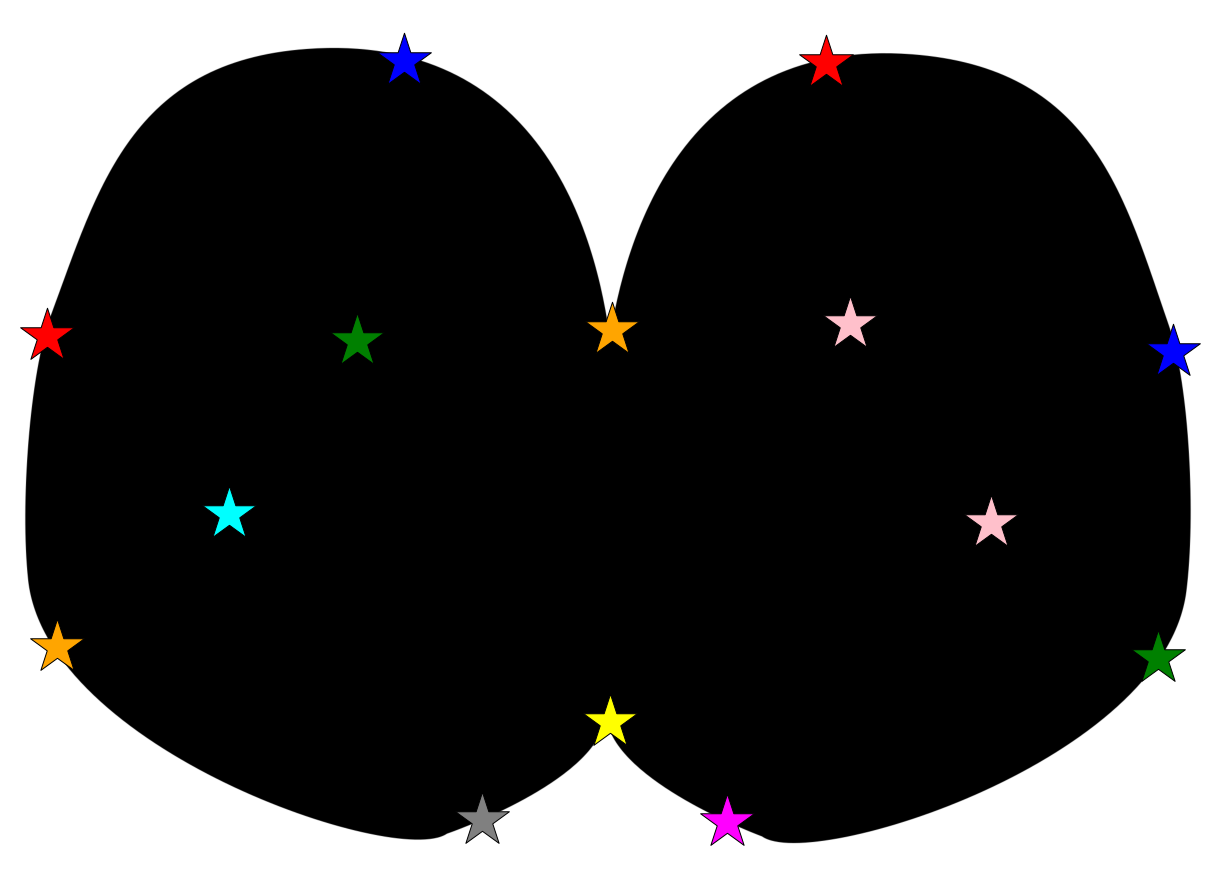

In [73]:
img = read_img(MOB_PTHS["image"])
lmk = read_lmk(MOB_PTHS["landmarks"])

viz_ref(img,lmk,marker_size=3200)
plt.show()

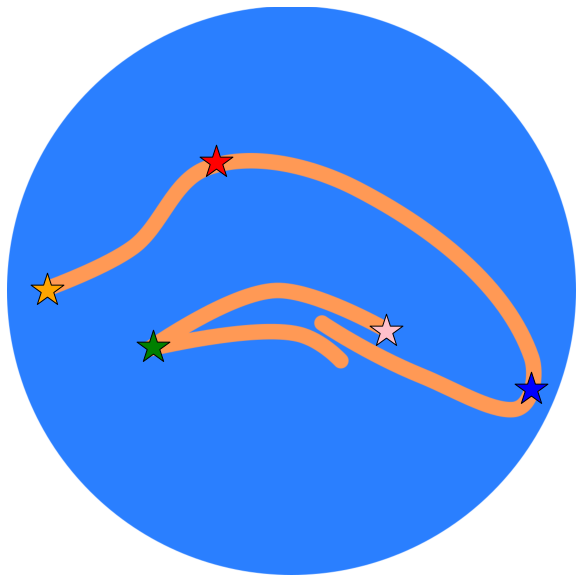

In [57]:
img = read_img(HIP_PTHS["image"])
lmk = read_lmk(HIP_PTHS["landmarks"])

viz_ref(img,lmk,marker_size=1200)
plt.show()

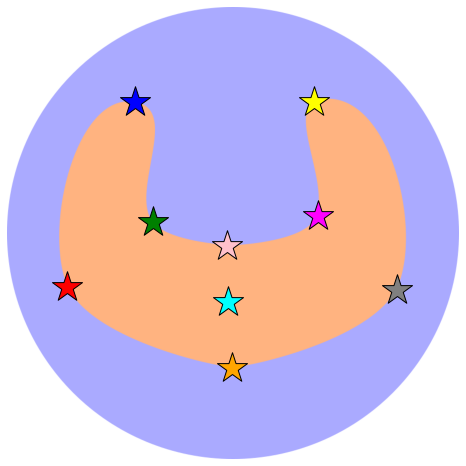

In [58]:
img = read_img(SYN_PTHS["image"])
lmk = read_lmk(SYN_PTHS["landmarks"])

viz_ref(img,lmk,marker_size=1000)
plt.show()

In [41]:
bcA = ad.read_h5ad(BCA_PTHS)
bcA

Variable names are not unique. To make them unique, call `.var_names_make_unique`.


AnnData object with n_obs × n_vars = 3798 × 36601
    obs: 'in_tissue', 'array_row', 'array_col'
    var: 'gene_ids', 'feature_types', 'genome'
    uns: 'curated_landmarks', 'spatial'
    obsm: 'spatial'

In [85]:
 bcA.uns["spatial"]["V1_Breast_Cancer_Block_A_Section_1"]["scalefactors"]

{'fiducial_diameter_fullres': 286.70121045935537,
 'spot_diameter_fullres': 177.48170171293427,
 'tissue_hires_scalef': 0.08250825,
 'tissue_lowres_scalef': 0.024752475}

In [98]:
dia

14.64370461535621

[20. 20.]


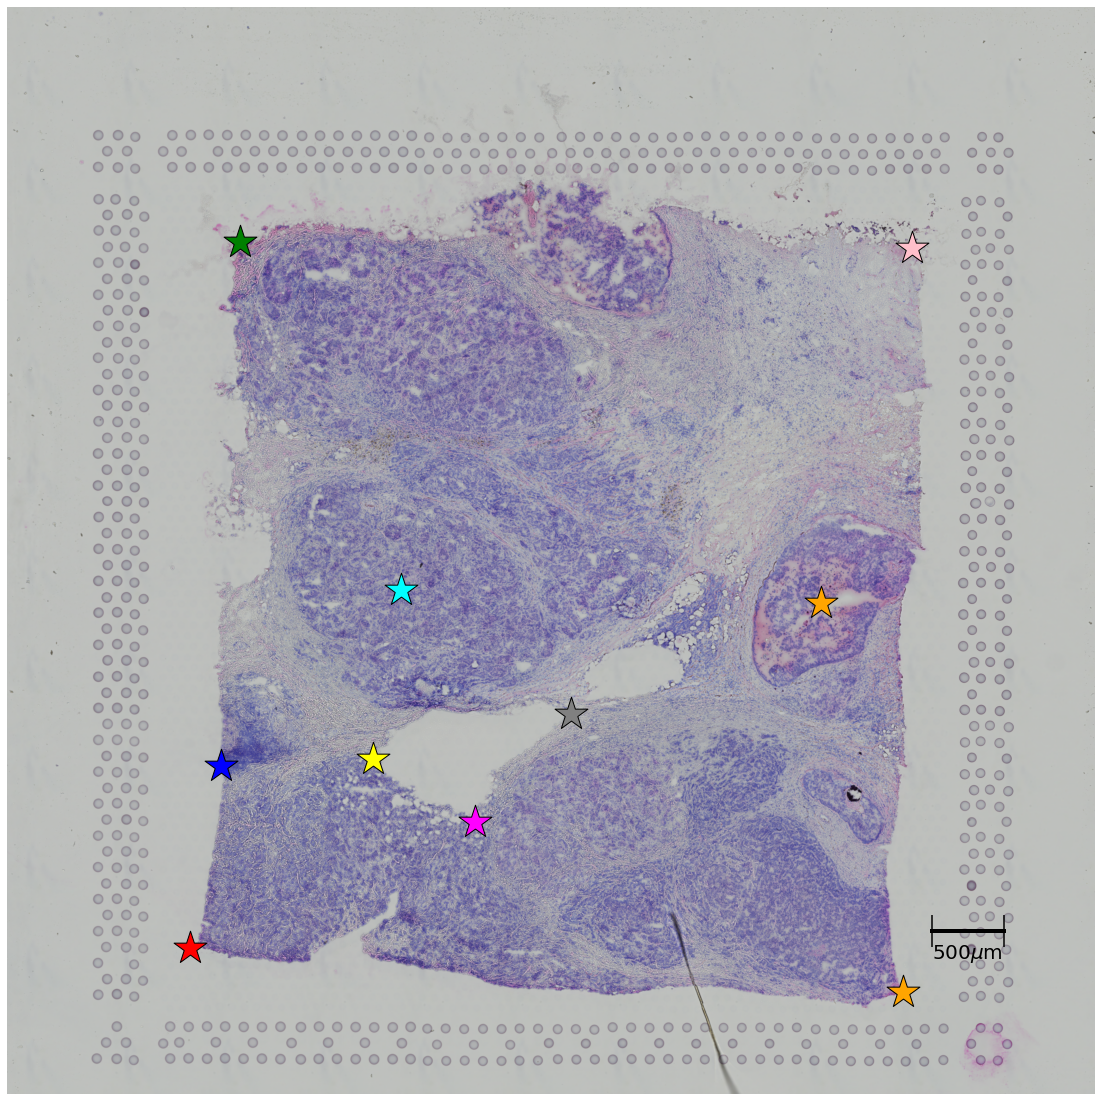

In [114]:
img = bcA.uns["spatial"]["V1_Breast_Cancer_Block_A_Section_1"]["images"]["hires"]
sf = bcA.uns["spatial"]["V1_Breast_Cancer_Block_A_Section_1"]["scalefactors"]["tissue_hires_scalef"]

dia = bcA.uns["spatial"]["V1_Breast_Cancer_Block_A_Section_1"]["scalefactors"]["spot_diameter_fullres"] * sf
scalebar = dia * 500 / 55

lmk = bcA.uns["curated_landmarks"] * sf
viz_ref(img,lmk,marker_size=1200)
plt.plot([1700,1700+scalebar],[1700,1700],linewidth = 4,color ="black")

plt.scatter([1700,1700+scalebar],[1700,1700],marker ="|",s = 1000,c ="black")
plt.text(x = 1700 + scalebar/2,y = 1750,s = r"500$\mu$m",horizontalalignment ="center",fontsize = 20)
plt.show()


## Charted sample

### MOB

In [117]:
import os
import os.path as osp
MOB_DATA_DIR = "../../data/science-mob/charted/"
adatas = {p.split(".")[0]:ad.read_h5ad(osp.join(MOB_DATA_DIR,p)) for p in os.listdir(MOB_DATA_DIR)}
adatas = {f"Rep{k}_MOB" : adatas[f"Rep{k}_MOB"] for k \
          in sorted([ int(a.lstrip("Rep_").rstrip("_MOB")) for a in adatas.keys()])}

In [129]:
adata.uns["spatial"][name]["scalefactors"]

{'spot_diameter_fullres': 320, 'tissue_hires_scalef': 0.21}

In [146]:
from scipy.spatial.distance import cdist
def get_phys_dist_st1k(adata,target = 500):
    crd = adata.obsm["spatial"]
    dmat = cdist(crd,crd)
    dmat[dmat==0] = np.inf
    min_d = np.min(dmat,axis=1).mean()
    return min_d * 500 / 200


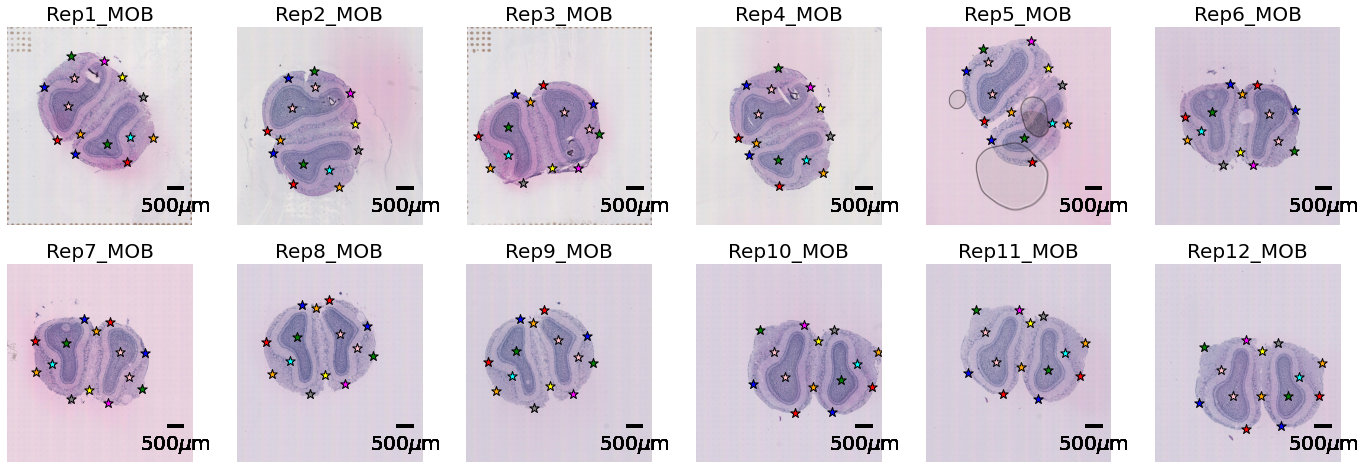

In [162]:
fig,ax = plt.subplots(2,6,figsize =(24,8))
marker_size = 100
sc_x = 1700
ax = ax.flatten()
for k,(name,adata) in enumerate(adatas.items()):
    img = adata.uns["spatial"][name]["images"]["hires"]
    sf = adata.uns["spatial"][name]["scalefactors"]["tissue_hires_scalef"]
    lmk = adata.uns["curated_landmarks"] *sf
    scalebar = get_phys_dist_st1k(adata) * sf
    ax[k].imshow(img)
    for ii in range(len(lmk)):
        ax[k].scatter(lmk[ii,0],
                     lmk[ii,1],
                    marker = "*",
                    c = eg.constants.LANDMARK_CMAP[ii % len(eg.constants.LANDMARK_CMAP)],
                    s = marker_size,
                    edgecolor ="black",
                   )
        
        ax[k].plot([sc_x,sc_x+scalebar],[1700,1700],linewidth = 4,color ="black")

        ax[k].text(x = sc_x + scalebar/2,
                   y = 1950,
                   s = r"500$\mu$m",
                   horizontalalignment ="center",
                   fontsize = 20)
    
        ax[k].set_title(name,fontsize=20)
    ax[k].axis("off")

In [155]:
SYN_IMG_DIR = "/home/alma/w-projects/ccf/rsc/ref/2comp_2/"
SYN_LMK_DIR = osp.join(SYN_IMG_DIR,"landmarks")
img_paths = [osp.join(SYN_IMG_DIR,"t_{}.png".format(x)) for x in range(0,8)]
lmk_paths = [osp.join(SYN_LMK_DIR,"t_{}_landmarks.tsv".format(x)) for x in range(0,8)]

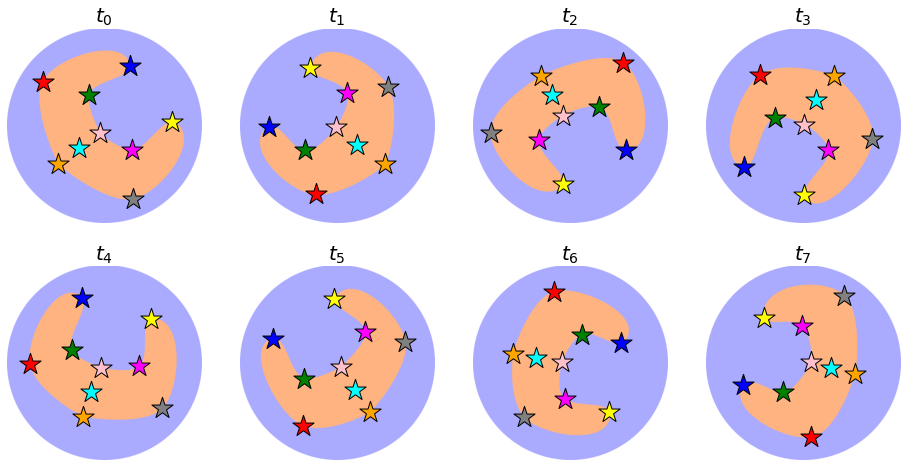

In [164]:
marker_size = 500
fig,ax = plt.subplots(2,4,figsize =(16,8))
ax = ax.flatten()
for k in range(len(img_paths)):
    img = read_img(img_paths[k])
    lmk = eg.ut.pd_to_np(read_lmk(lmk_paths[k]))
    ax[k].imshow(img)
    for ii in range(len(lmk)):
        ax[k].scatter(lmk[ii,0],
                     lmk[ii,1],
                    marker = "*",
                    c = eg.constants.LANDMARK_CMAP[ii % len(eg.constants.LANDMARK_CMAP)],
                    s = marker_size,
                    edgecolor ="black",
                   )
    
    ax[k].axis("off")
    ax[k].set_title(r"$t_{}$".format(k),fontsize=20)

In [166]:
bcB = ad.read_h5ad(BCB_PTHS)
bcB

Variable names are not unique. To make them unique, call `.var_names_make_unique`.


AnnData object with n_obs × n_vars = 3987 × 36601
    obs: 'in_tissue', 'array_row', 'array_col'
    var: 'gene_ids', 'feature_types', 'genome'
    uns: 'curated_landmarks', 'spatial'
    obsm: 'spatial'

[20. 20.]


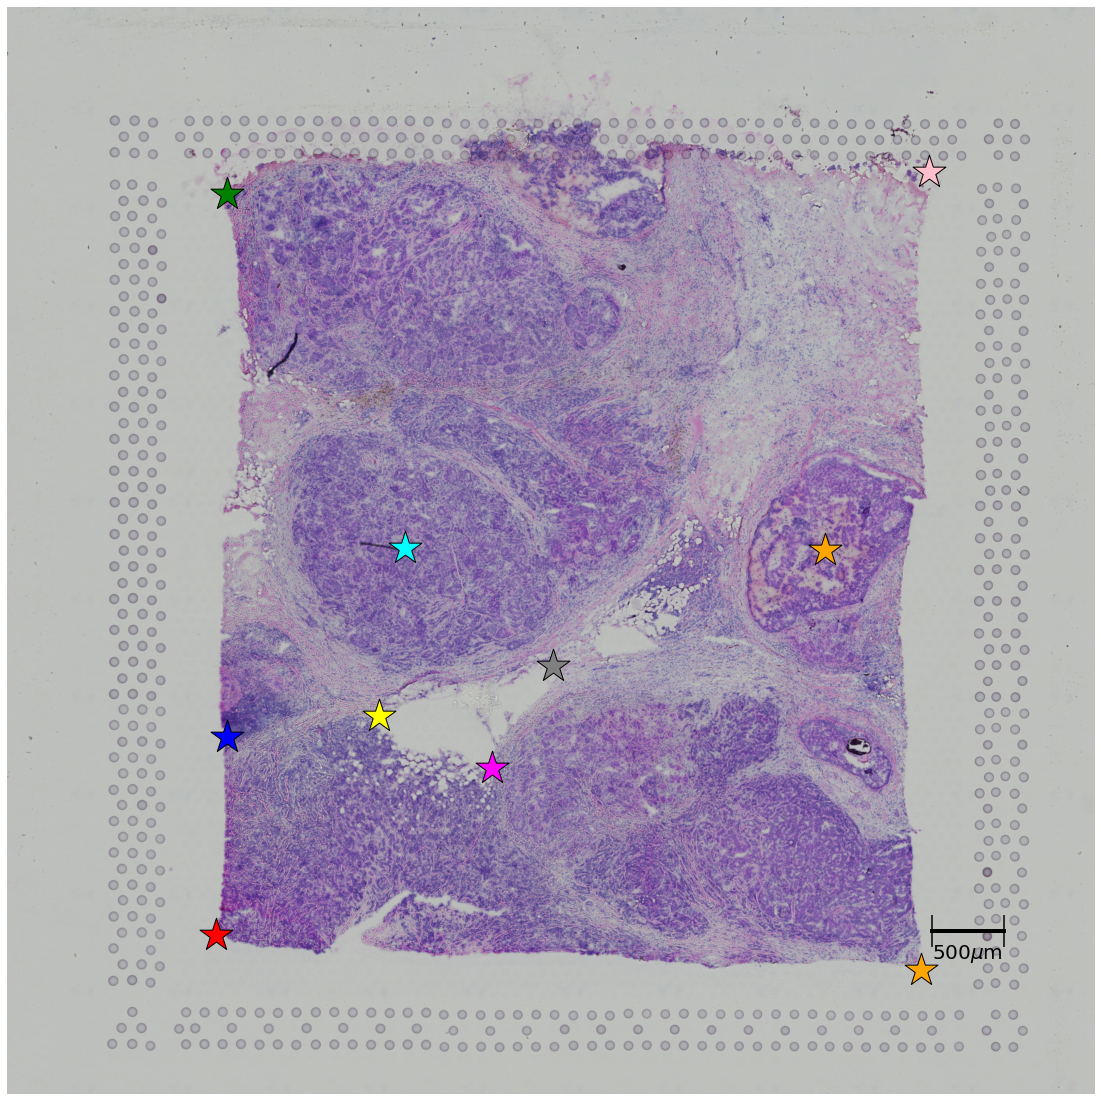

In [168]:
img = bcB.uns["spatial"]["V1_Breast_Cancer_Block_A_Section_2"]["images"]["hires"]
sf = bcB.uns["spatial"]["V1_Breast_Cancer_Block_A_Section_2"]["scalefactors"]["tissue_hires_scalef"]

dia = bcB.uns["spatial"]["V1_Breast_Cancer_Block_A_Section_2"]["scalefactors"]["spot_diameter_fullres"] * sf
scalebar = dia * 500 / 55

lmk = bcB.uns["curated_landmarks"] * sf
viz_ref(img,lmk,marker_size=1200)
plt.plot([1700,1700+scalebar],[1700,1700],linewidth = 4,color ="black")

plt.scatter([1700,1700+scalebar],[1700,1700],marker ="|",s = 1000,c ="black")
plt.text(x = 1700 + scalebar/2,y = 1750,s = r"500$\mu$m",horizontalalignment ="center",fontsize = 20)
plt.show()


In [169]:
VIS_PTH = "/home/alma/w-projects/ccf/data/visium-hippo/hippo-only.h5ad"
SS_PTH ="/home/alma/w-projects/ccf/data/slideseq-hippo/Puck_200115_08/curated/Puck_200115_08.h5ad"

In [170]:
adata_1 = ad.read_h5ad(VIS_PTH)
adata_2 = ad.read_h5ad(SS_PTH)

Variable names are not unique. To make them unique, call `.var_names_make_unique`.


In [182]:
lmk

array([[2665.05329272, 4178.26151824],
       [3794.31316251, 3229.68322762],
       [5985.07730992, 4742.89145314],
       [3568.46118856, 4313.77270262],
       [4878.40263752, 4291.18750522]])

In [225]:
ylim

[283.23551430000003, 1107.7655670400002]

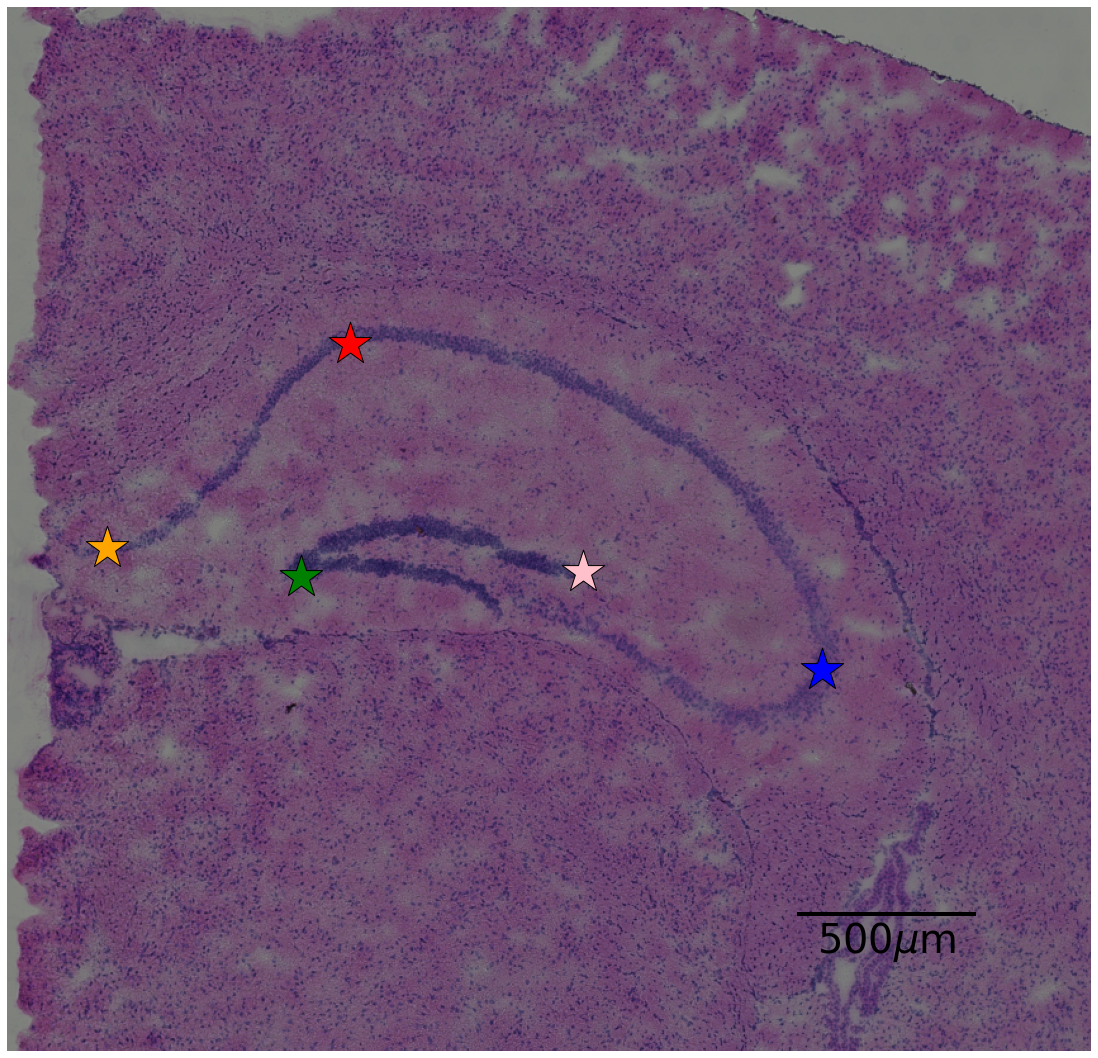

In [233]:
marker_size = 2000
img = adata_1.uns["spatial"]["V1_Adult_Mouse_Brain"]["images"]["hires"]
sf = adata_1.uns["spatial"]["V1_Adult_Mouse_Brain"]["scalefactors"]["tissue_hires_scalef"]
lmk = adata_1.uns["curated_landmarks"] * sf
figsize = np.array(img.shape[0:2]) / 100
fig,ax = plt.subplots(1,1,figsize=figsize)
ax.imshow(img)


for ii in range(len(lmk)):
        ax.scatter(lmk[ii,0],
                    lmk[ii,1],
                    marker = "*",
                    c = eg.constants.LANDMARK_CMAP[ii % len(eg.constants.LANDMARK_CMAP)],
                    s = marker_size,
                    edgecolor ="black",
                   )
        
crd = adata_1.obsm["spatial"] * sf
xlim = [min(crd[:,0])*0.9,max(crd[:,0])*1.1]
ylim = [min(crd[:,1])*0.9,max(crd[:,1])*1.1]
ax.set_xlim(xlim)
ax.set_ylim(ylim)
ax.invert_yaxis()
ax.axis("off")

dia = adata_1.uns["spatial"]["V1_Adult_Mouse_Brain"]["scalefactors"]["spot_diameter_fullres"] * sf
scalebar = dia * 500 / 55

sc_x = 1000
sc_y = 1000
ax.plot([sc_x,sc_x+scalebar],[sc_y,sc_y],linewidth = 4,color ="black")

ax.text(x = sc_x + scalebar/2,y = sc_y + 30,s = r"500$\mu$m",horizontalalignment ="center",fontsize = 40)
plt.show()

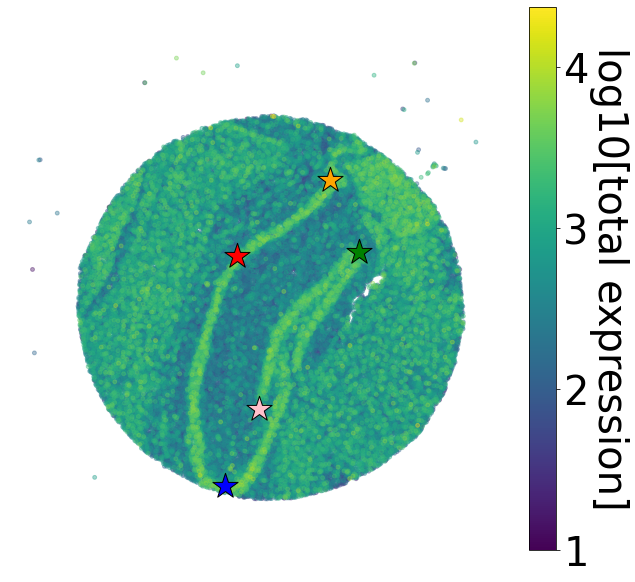

In [245]:
exp = np.array(adata_2.X.sum(axis=1)).flatten()
exp = np.log10(exp)

landmarks = True
ordr = np.argsort(exp)
fig,ax = plt.subplots(1,1,figsize = (11,10))
sca = ax.scatter(adata_2.obsm["spatial"][ordr,0],
                adata_2.obsm["spatial"][ordr,1],
                c = exp[ordr],
                s = 15,
                 alpha = 0.4,
               )
if landmarks:
    for ii in range(len(adata_2.uns["curated_landmarks"])):
        ax.scatter(adata_2.uns["curated_landmarks"][ii,0],
                    adata_2.uns["curated_landmarks"][ii,1],
                    c = eg.constants.LANDMARK_CMAP[ii % len(eg.constants.LANDMARK_CMAP)],
                    marker = "*",
                    edgecolor ="black",
                    s = 700,
                   )
ax.set_aspect("equal")
ax.axis("off")
ax.invert_yaxis()
cbar = fig.colorbar(sca)
cbar.set_alpha(1)
cbar.draw_all()
cbar.ax.tick_params(labelsize=40)
cbar.set_label("log10[total expression]", fontsize = 40, rotation=270,labelpad = 40)
plt.show()


In [ ]:
cbar.set_alpha(1)